In [61]:
import numpy as np
import random

path = [] # the final result list
dim = 10
p = 0.1
pic_size = 7
maze = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        if(random.random() < p):
            maze[i][j] = 1
# maze

In [62]:
# 返回某一点的邻居点
def neighbor(o):
    t = ()
    x, y, step = o
    if x > 0:
        t += (x-1, y, True if maze[x-1][y] == 0 else False),
    if x < dim - 1:
        t += (x+1, y, True if maze[x+1][y] == 0 else False),
    if y > 0:
        t += (x, y-1, True if maze[x][y-1] == 0 else False),
    if y < dim - 1:
        t += (x, y+1, True if maze[x][y+1] == 0 else False),
    return t

print(neighbor((5, 5, 0)))

((4, 5, True), (6, 5, True), (5, 4, True), (5, 6, True))


In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_maze(with_path=False):
    fig, ax = plt.subplots()
    for i in range(np.shape(maze)[0]):
        for j in range(np.shape(maze)[1]):
            x = i*10 + 1
            y = j*10 + 1
            h = 9
            w = 9
            cl = '#cc6600' if maze[i][j] == 1 else '#F0EEEE'
            if with_path is True and (i, j) in path:
                cl = 'green'
            rect = mpatches.Rectangle([x, y], w, h, color=cl)
            ax.add_patch(rect)

    plt.axis([0, dim*10 + 1, 0, dim*10 + 1])
    fig.set_size_inches(pic_size, pic_size)
    plt.show()

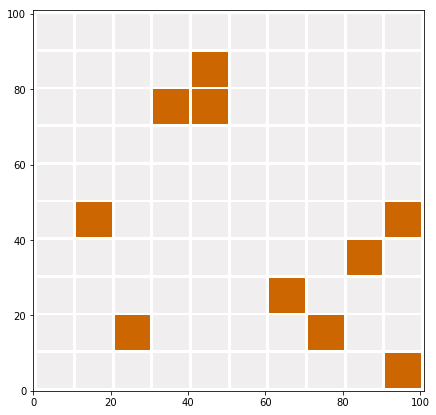

In [64]:
draw_maze()

In [65]:
# 初始化工作
path_stack = []
path_stack.append((0, 0, -1))
visited = [(0, 0)]
all_path = [(0, 0, 0)]
dest = (dim-1, dim-1)

In [66]:
# BFS 算法
front, rear = 0, 1
is_end = False
while front != rear:
    for nx, ny, nt in neighbor(path_stack[front]):
        if (nt is True) and (nx, ny) not in visited:
            # print('append')
            if (nx, ny) == dest:
                print('get to the dest:',front)
                # print(path_stack)
                path.append((nx, ny))
                temp_parent = front
                while temp_parent != -1:
                    node_x, node_y, node_p = path_stack[temp_parent]
                    path.append((node_x, node_y))
                    temp_parent = node_p
                is_end = True
                break
            path_stack.append((nx, ny, front))
            visited.append((nx, ny))
            rear += 1
    if is_end:
        break
    front += 1

get to the dest: 87


In [67]:
# path

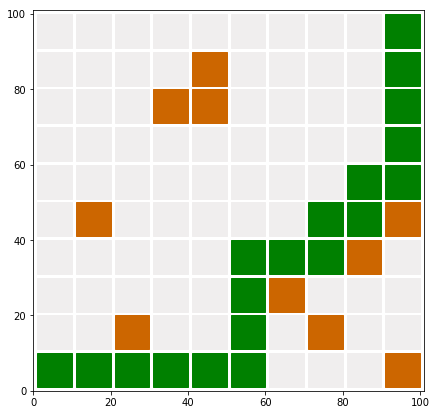

In [68]:
draw_maze(with_path=True)

In [69]:
len(visited)

89

In [1]:
#Jiyu's work

In [19]:
#generate a maze randomly
import numpy as np
import random
def make_maze(dim, p):
    maze = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            if(random.random() < p):
                maze[i][j] = 1
    return maze

dim = 10
p = 0.2
maze = make_maze(dim, p)

In [20]:
#method to use
from collections import deque
def add_method(fringe, method):
    if method == 1 or method == 0:
        def add(node):
            fringe.append(node)
    return add
def get_method(fringe,method):
    if method == 1:
        def get():
            return fringe.pop()
    elif method == 0:
        def get():
            return fringe.popleft()
    return get

def make_node(method):
    if method == 1:
        fringe = []
    elif method == 0:
        fringe = deque([])
    fringe.append((0,0))
    return fringe

def explore_method(visited, fringe):
    def explore(node):
        x, y = node
        nodes_to_add = []
        if x-1 > -1 and (x-1, y) not in visited and maze[x-1][y] == 0 and (x-1, y) not in fringe:
            nodes_to_add.append((x-1, y))
        if y-1 > -1 and (x, y-1) not in visited and maze[x][y-1] == 0 and (x, y-1) not in fringe:
            nodes_to_add.append((x, y-1))
        if y+1 < dim and (x, y+1) not in visited and maze[x][y+1] == 0 and (x, y+1) not in fringe:
            nodes_to_add.append((x,y+1))
        if x+1 < dim and (x+1, y) not in visited and maze[x+1][y] == 0 and (x+1, y) not in fringe:
            nodes_to_add.append((x+1,y))
        return nodes_to_add
    return explore

In [21]:
def search(maze, method, goal):
    """ 0 for BFS; 1 for DFS; """
    
    fringe = make_node(method)
    add = add_method(fringe, method)
    get = get_method(fringe, method)
    visited = []
    path = []
    explore = explore_method(visited, fringe)
    while fringe:
        node = get()
        visited.append(node)
        path.append(node)
        if node == goal:
            return path
        fringe.extend(explore(node))
    return False

In [22]:
#Example
path0 = search(maze, 0, (9,9))
path1 = search(maze, 1, (9,9))
print(maze)
print(path0)
print(path1)

[[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[(0, 0), (1, 0), (1, 1), (2, 0), (1, 2), (3, 0), (0, 2), (2, 2), (3, 1), (4, 0), (2, 3), (3, 2), (4, 1), (2, 4), (4, 2), (5, 1), (1, 4), (2, 5), (5, 2), (6, 1), (0, 4), (1, 5), (5, 3), (6, 2), (7, 1), (0, 5), (1, 6), (5, 4), (6, 3), (0, 6), (1, 7), (4, 4), (5, 5), (6, 4), (7, 3), (0, 7), (2, 7), (6, 5), (7, 4), (0, 8), (2, 8), (3, 7), (6, 6), (7, 5), (8, 4), (3, 8), (3, 6), (4, 7), (6, 7), (7, 6), (8, 5), (9, 4), (3, 9), (4, 8), (4, 6), (5, 7), (7, 7), (8, 6), (9, 5), (9, 3), (4, 9), (5, 8), (7, 8), (8, 7), (9, 6), (9, 2), (8, 8), (9, 7), (8, 2), (9, 1), (8, 9), 